In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import nltk
import regex as re
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
%matplotlib inline

In [77]:
df = pd.read_csv('../data_csv/eda_df.csv')

In [78]:
df.head()

,title,subreddit
0,What do you guys enjoy about your job?,1
1,"Why the rich stay rich, maybe",1
2,Speechless and sad,1
3,Misogynistic Guy Demands A Pie Chart,1
4,Customer angry refunds are not instantaneous,1


In [79]:
X = df['title']
y = df['subreddit']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [81]:
cvec = CountVectorizer()

In [82]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])
params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__max_features': [1000, 2500, 5000],
}
gs = GridSearchCV(pipe, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [83]:
print(gs.best_score_)

0.6908333333333332


In [84]:
cross_val_score(gs, X_train, y_train, cv=5).mean()

0.6908333333333332

In [85]:
multinomial_best_model = gs.best_estimator_

In [86]:
multinomial_best_model.score(X_train, y_train)

0.8491666666666666

In [87]:
multinomial_best_model.score(X_test, y_test)

0.7295

In [88]:
gs.best_params_

{'cvec__max_features': 5000,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [89]:
print(f'Score on Multinomial title training set: {gs.score(X_train, y_train)}')
print(f'Score on Multinomial title testing set: {gs.score(X_test, y_test)}')

Score on Multinomial title training set: 0.8491666666666666
Score on Multinomial title testing set: 0.7295


In [90]:
## this code is from the week 4 lab 2 Prediciting Kidney Disease Author: Matt Brems 
def roc(probas, true, step=0.01):
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labesl vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();

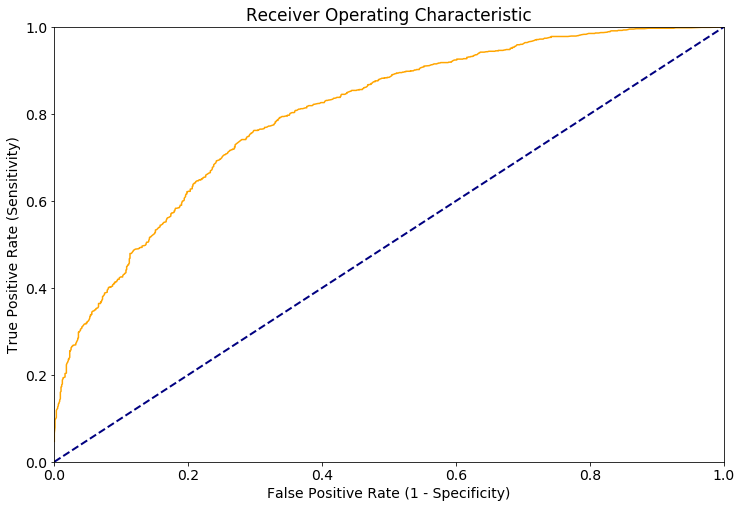

In [91]:
plt.figure(figsize = (12,8))
probabilities = gs.predict_proba(X_test)

roc(probas = probabilities, # pass in series of probabilities 
    true = y_test,          # pass in series of true values
    step=0.001); 

In [92]:
probabilities

array([[0.77339412, 0.22660588],
       [0.42721018, 0.57278982],
       [0.43681595, 0.56318405],
       ...,
       [0.44643028, 0.55356972],
       [0.5317099 , 0.4682901 ],
       [0.78623571, 0.21376429]])

In [93]:
preds = gs.predict(X_test)

In [94]:
preds[1:21]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

C:\Users\blang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


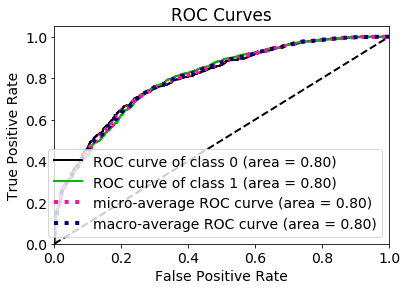

In [95]:
import scikitplot as skplt #to make things easy
y_pred_proba = gs.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [96]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[730 270]
 [271 729]]


In [97]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.729


In [98]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.73


In [99]:
prec = tp / (tp +fp)

print(f'Precision: {round(prec, 4)}')

Precision: 0.7297


In [100]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, preds)
print(auc)

0.7295


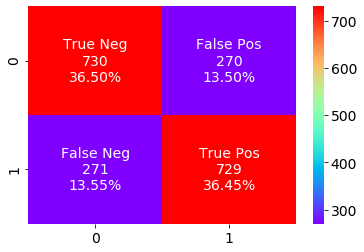

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
##### this code was found on https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='rainbow')

In [102]:
text_df = pd.read_csv('../data_csv/clean.csv')

In [103]:
X = text_df['selftext']
y = text_df['subreddit']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [105]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])
params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2), (2,3)],
    'cvec__max_features': [1000, 2500, 5000],
}
gs = GridSearchCV(pipe, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [106]:
print(gs.best_score_)
gs.best_params_

0.9489512699689691


{'cvec__max_features': 5000,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [107]:
print(f'Score on Multinomial text training set: {gs.score(X_train, y_train)}')
print(f'Score on Multinomial text testing set: {gs.score(X_test, y_test)}')

Score on Multinomial text training set: 0.9605761940864291
Score on Multinomial text testing set: 0.9462121212121212


In [108]:
preds = gs.predict(X_test)

In [109]:
preds[:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [110]:
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[455  29]
 [ 42 794]]


In [111]:
print(f'Sensitivity: {round(sens, 4)}')
print(f'Specificity: {round(spec, 4)}')
print(f'Precision: {round(prec, 4)}')
print(f'AUC: {auc}')

Sensitivity: 0.729
Specificity: 0.73
Precision: 0.7297
AUC: 0.7295


C:\Users\blang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


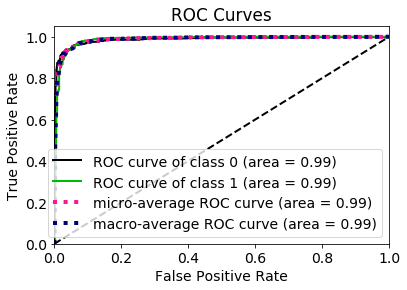

In [112]:
y_pred_proba = gs.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

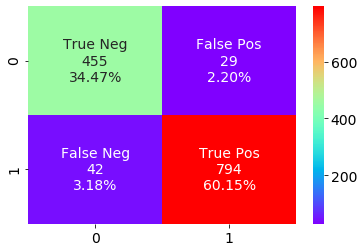

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
##### this code was found on https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='rainbow')